In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dataset import Dataset
dataset = Dataset()

In [3]:
def get_image(patch, index):
    """
    Arguments:
      patch: patch image
      index: 0,1,2      
    """
    x = 5*index
    return patch[:, x:x+16].reshape([-1])

In [7]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438894
-0.0016897096


In [23]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.005
#k2 = 0.01

k1 = 0.005
k2 = 0.01

U_scale = 1.0
I_scale = 1.0

sigma_sq = 1.0
sigma_sq_td = 10.0
alpha1 = 1.0
alpha2 = 0.05
lambd = 0.02

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    patch = dataset.patches[k]    
    for i in range(10):
        for j in range(3):
            I = get_image(patch, j) * I_scale            
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    #if k % 40 == 0:
    #    k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=-0.0005668453001220135 std=0.2889527432763033
rs mean=-0.0002639594895299524 std=0.03545515984296799
us mean=0.004537602340398532 std=0.24616935903600512
rs mean=0.0007356827263720334 std=0.3960346579551697
us mean=0.0030567347548642603 std=0.221910052810714
rs mean=0.039986107498407364 std=0.8139457106590271
us mean=-0.0008436572960199922 std=0.20188095809098167
rs mean=0.0029577724635601044 std=0.23065577447414398
us mean=0.005532553438792477 std=0.21381655677162548
rs mean=0.05077839270234108 std=0.5561456084251404
us mean=0.0018949558449726563 std=0.18054038808839498
rs mean=0.010718201287090778 std=0.11178262531757355
us mean=0.004621891055713333 std=0.23971621621755093
rs mean=0.06520041823387146 std=0.952538251876831
us mean=0.005525666247547346 std=0.2966626159454715
rs mean=-0.0765056163072586 std=0.7733364105224609
us mean=0.0025261203809430702 std=0.3140236755427931
rs mean=0.0586509145796299 std=0.6798587441444397
us mean=-0.006840534223447923 std=0.3010869116935658

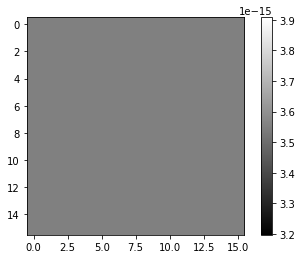

In [20]:
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

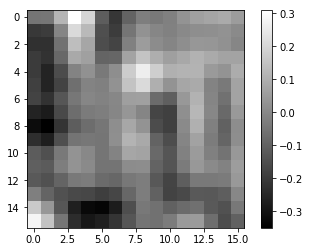

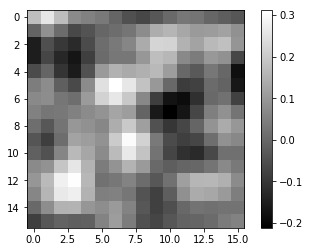

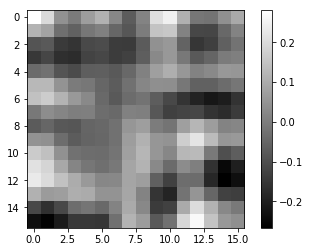

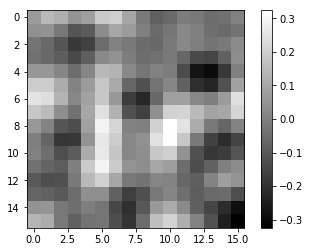

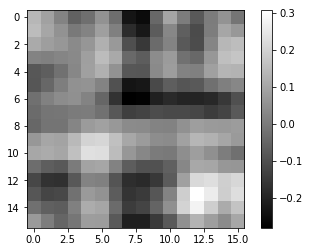

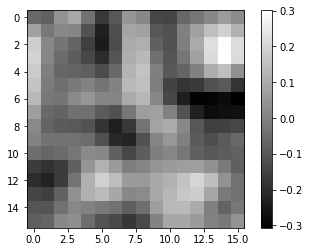

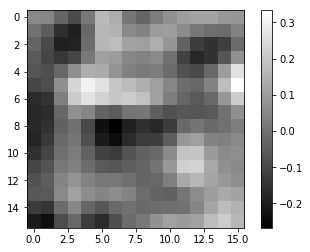

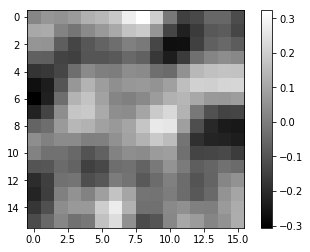

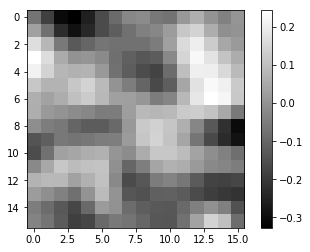

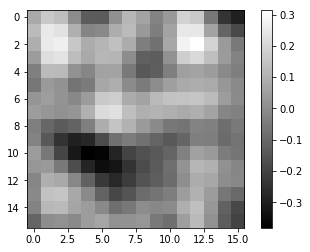

In [21]:
for i in range(10):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

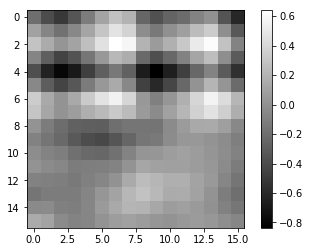

In [16]:
patch = dataset.patches[0]
for j in range(3):
    I = get_image(patch, j) * I_scale 
    
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()